In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
users = pd.read_csv('movielens/users.dat', header=None, sep='::',
                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
users.head(5)

<ipython-input-39-7a8334084e7c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('movielens/users.dat', header=None, sep='::',


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [40]:
movies = pd.read_csv('movielens/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'])
movies.head(5)

<ipython-input-40-5b0cdfe3728f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('movielens/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'])


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
ratings = pd.read_csv('movielens/ratings.dat', sep='::', header=None,
                      names=['user_id', 'movie_id', 'ratings', 'timestamp'])
ratings.head(5)

<ipython-input-41-5327adb742ea>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('movielens/ratings.dat', sep='::', header=None,


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [42]:
data = pd.merge(pd.merge(ratings, movies), users)
data

,user_id,movie_id,ratings,timestamp,title,genres,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


In [43]:
s1 = data['title'].value_counts()
s1

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
One Little Indian (1973)                                    1
Superweib, Das (1996)                                       1
Tainted (1998)                                              1
Jar, The (Khomreh) (1992)                                   1
Death in Brunswick (1991)                                   1
Name: title, Length: 3706, dtype: int64

In [44]:
s1.sort_values(ascending=True)

Death in Brunswick (1991)                                   1
Number Seventeen (1932)                                     1
Fausto (1993)                                               1
Heaven's Burning (1997)                                     1
Fall Time (1995)                                            1
                                                         ... 
Jurassic Park (1993)                                     2672
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode IV - A New Hope (1977)                2991
American Beauty (1999)                                   3428
Name: title, Length: 3706, dtype: int64

In [45]:
# popular films
s1 = data['title'].value_counts()
s2 = s1[s1 > 500]
popular_film_titles = s2.index
popular_film_titles

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Ordinary People (1980)', 'Ice Storm, The (1997)',
       'Peggy Sue Got Married (1986)', 'Halloween (1978)', '28 Days (2000)',
       'Alien Nation (1988)', 'Body Heat (1981)',
       'Guns of Navarone, The (1961)', 'Emma (1996)',
       'Postino, Il (The Postman) (1994)'],
      dtype='object', length=617)

In [46]:
d1 = data[['title', 'gender', 'ratings']]
d1

,title,gender,ratings
0,One Flew Over the Cuckoo's Nest (1975),F,5
1,James and the Giant Peach (1996),F,3
2,My Fair Lady (1964),F,3
3,Erin Brockovich (2000),F,4
4,"Bug's Life, A (1998)",F,5
...,...,...,...
1000204,Footloose (1984),M,2
1000205,MacKenna's Gold (1969),M,3
1000206,Pumpkinhead (1988),M,4
1000207,Missing in Action (1984),M,2


In [47]:
d2 = d1.pivot_table('ratings', aggfunc='mean', index='title', columns=['gender'])
d2

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [48]:
d3 = d2.loc[popular_film_titles]
d3

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
Alien Nation (1988),3.433333,3.195946
Body Heat (1981),3.943925,4.055416
"Guns of Navarone, The (1961)",4.061224,3.953642
Emma (1996),4.061151,3.654709


In [49]:
# top 10 films that were loved by females
d4 = d3.sort_values(by='F', ascending=False).head(10)
d4

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248
Rear Window (1954),4.484536,4.472991
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Sixth Sense, The (1999)",4.477410,4.379944
Some Like It Hot (1959),4.462745,4.228769


In [50]:
# top 10 films that were loved by males
d4 = d3.sort_values(by='M', ascending=False).head(10)
d4

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795
Rear Window (1954),4.484536,4.472991


In [52]:
d3['diff'] = d3['F'] - d3['M']
d3['diff'] = d3['diff'].abs()

In [54]:
d5 = d3.sort_values(by='diff', ascending=False).head(10)
d5

gender,F,M,diff
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Grease (1978),3.975265,3.367041,0.608224
Caddyshack (1980),3.396135,3.969737,0.573602
Animal House (1978),3.628906,4.167192,0.538286
"Exorcist, The (1973)",3.537634,4.067239,0.529605
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
Big Trouble in Little China (1986),2.987952,3.485030,0.497078


In [56]:
d6 = d5.copy()
d7 = d6.drop(columns=['F', 'M'])
d7

gender,diff
Dirty Dancing (1987),0.830782
"Good, The Bad and The Ugly, The (1966)",0.726351
Dumb & Dumber (1994),0.638608
Evil Dead II (Dead By Dawn) (1987),0.611985
Grease (1978),0.608224
Caddyshack (1980),0.573602
Animal House (1978),0.538286
"Exorcist, The (1973)",0.529605
"Rocky Horror Picture Show, The (1975)",0.512885
Big Trouble in Little China (1986),0.497078


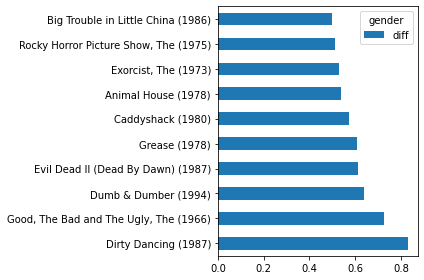

In [63]:
d7.plot(kind='barh')
plt.tight_layout()
plt.savefig('disagree.jpg', format='jpg')